In [1]:
from lattice2d_linear_env import Lattice2DLinearEnv
import numpy as np
import math
import random

In [2]:
C = 1.41 # Constant in MCTS exploration
env = Lattice2DLinearEnv("HHHHHH")

class MCTSNode():
    def __init__(self, state, parent = None):
        self.state = state # state = tuple of ele in (0,1,2) denoting actions taken thus far
        self.Q = 0
        self.N = 0
        self.children = {} # dict of children: Action : Child
        self.parent = parent
        self.score = 0.0
        
    def add_child(self, child, action):
        self.children.update( {action: child} )
    
    def update(self, Q):
        if self.parent != None:
            self.Q += Q
            self.N += 1
            self.score = self.Q / self.N + 2 * C * math.sqrt(2 * math.log(self.parent.N + 1) / self.N)
            self.parent.update(Q) 

In [3]:
def MCTS(root, max_iter):
    for i in range(max_iter):
        # print("Iteration {}".format(i))
        leaf = traverse(root)
        # print(leaf.state)
        sim_result = rollout(leaf)
        leaf.update(sim_result)
        
    return best_action(root)

In [4]:
def traverse(node):
    while len(list(node.children.keys())) == 3 and len(node.state) <= len(env.seq) - 1: # While fully expanded
        node = best_uct(node)
        
    if len(node.state) == len(env.seq) - 1: # If node is terminal
        return node
    
    if len(list(node.children.values())) != 3: # Not fully expanded -> pick unvisited child
        unvisited = [a for a in range(3) if a not in list(node.children.keys())] # list of untaken actions / unvisited children
        action = random.choice(unvisited)
        child = MCTSNode(node.state + (action,), node)
        node.add_child(child, action)
        return child

In [5]:
def rollout(node):
    trajectory = node.state
    while len(trajectory) != len(env.seq) - 1:
        trajectory += (random.choice(range(3)),) # simulate random policy until end of the game
    # Compute reward
    state = env.reset()
    a = 0
    reward = 0
    for i in range(len(trajectory)):
        # print(a, end = " ")
        _, reward, _, _ = env.step(a)
        a = (3 * a + trajectory[i]) % 4
    # print(" Reward: {}".format(reward))
    return reward

In [6]:
def best_action(node):
    action = list(node.children.keys())[0]
    for i in list(node.children.keys()):
        if node.children[i].N > node.children[action].N:
            action = i
    return action

In [7]:
def best_uct(node):
    child = node.children[0]
    for i in range(3):
        if node.children[i].score > child.score:
            child = node.children[i]
    return child

In [8]:
def run_MCTS_policy(root, best):
    state = env.reset()
    a = 0
    while True:
        # print(root.state)
        _, _, done, _ = env.step(a)
        env.render()
        if done:
            break
        best = best_action(root)
        root = root.children[best]
        a = (3 * a + best) % 4

In [9]:
root = MCTSNode(())
best = MCTS(root, 1000)

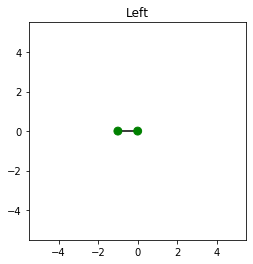

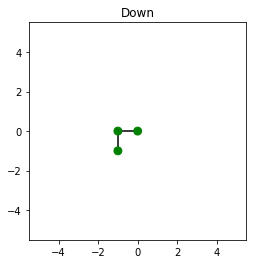

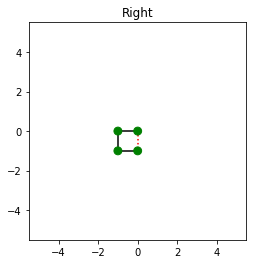

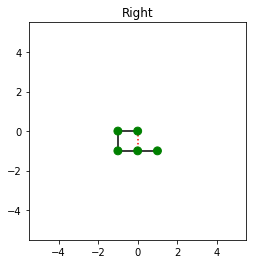

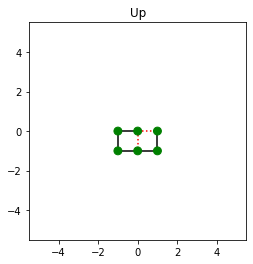

In [10]:
run_MCTS_policy(root, best)